In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### Check Missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the data set


### Check Duplicate Values

In [7]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set

### check information

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race/ethnicity               1000 non-null   str  
 2   parental level of education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test preparation course      1000 non-null   str  
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


### check Unique Values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())
print("\n")
print("categories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())
print("\n")
print("categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())
print("\n")
print("categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())
print("\n")
print("categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:  <StringArray>
['female', 'male']
Length: 2, dtype: str


categories in 'race/ethnicity' variable:  <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str


categories in 'parental level of education' variable:  <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str


categories in 'lunch' variable:  <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str


categories in 'test preparation course' variable:  <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'str']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'str']

print(f'we have {len(numeric_features)} numerical features : {numeric_features}')
print(f'we have {len(categorical_features)} categorical features : {categorical_features}')

we have 3 numerical features : ['math score', 'reading score', 'writing score']
we have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding columns for"Total Score" and "Average"

In [14]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average']= df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
math_score = df[df['math score']==100]['math score'].count()
reading_full=df[df['reading score'] == 100]['reading score'].count()
writing_full=df[df['writing score']==100]['writing score'].count()

print(f'Number of students with full marks in Math: {math_score}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')


Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [16]:
reading_less_20=df[df['reading score']<=20]['reading score'].count()
writing_less_20=df[df['writing score']<=20]['writing score'].count()
math_less_20=df[df['math score']<=20]['math score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights

       From above values we get students have performed the worst in Maths
       Best performance is in reading section

###  Exploring Data ( Visualization )
####  Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

Histogram & KDE

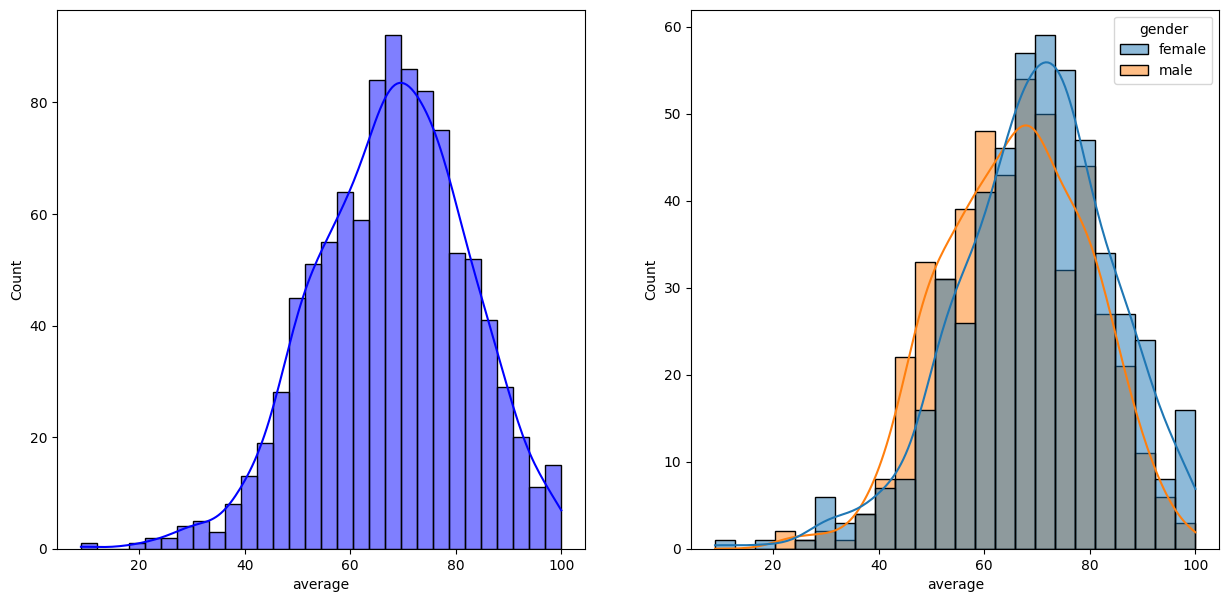

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', kde=True, color='blue', bins=30)
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True,hue='gender')
plt.show()

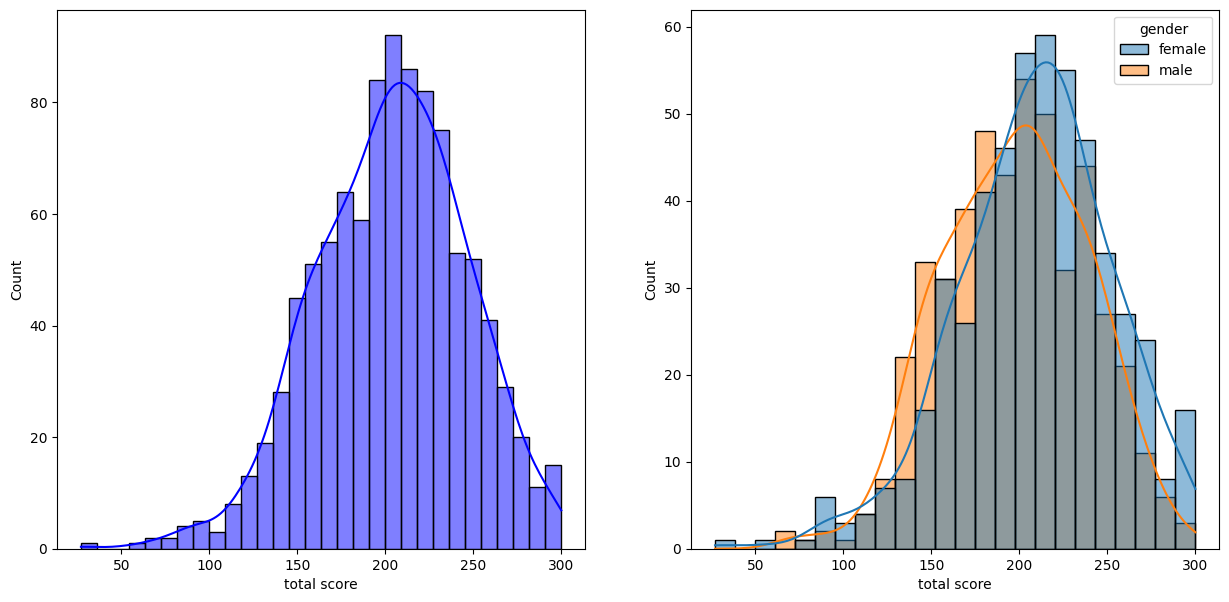

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', kde=True, color='blue', bins=30)
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True,hue='gender')
plt.show()

### Insights
 - Female students tend to perform well then male students

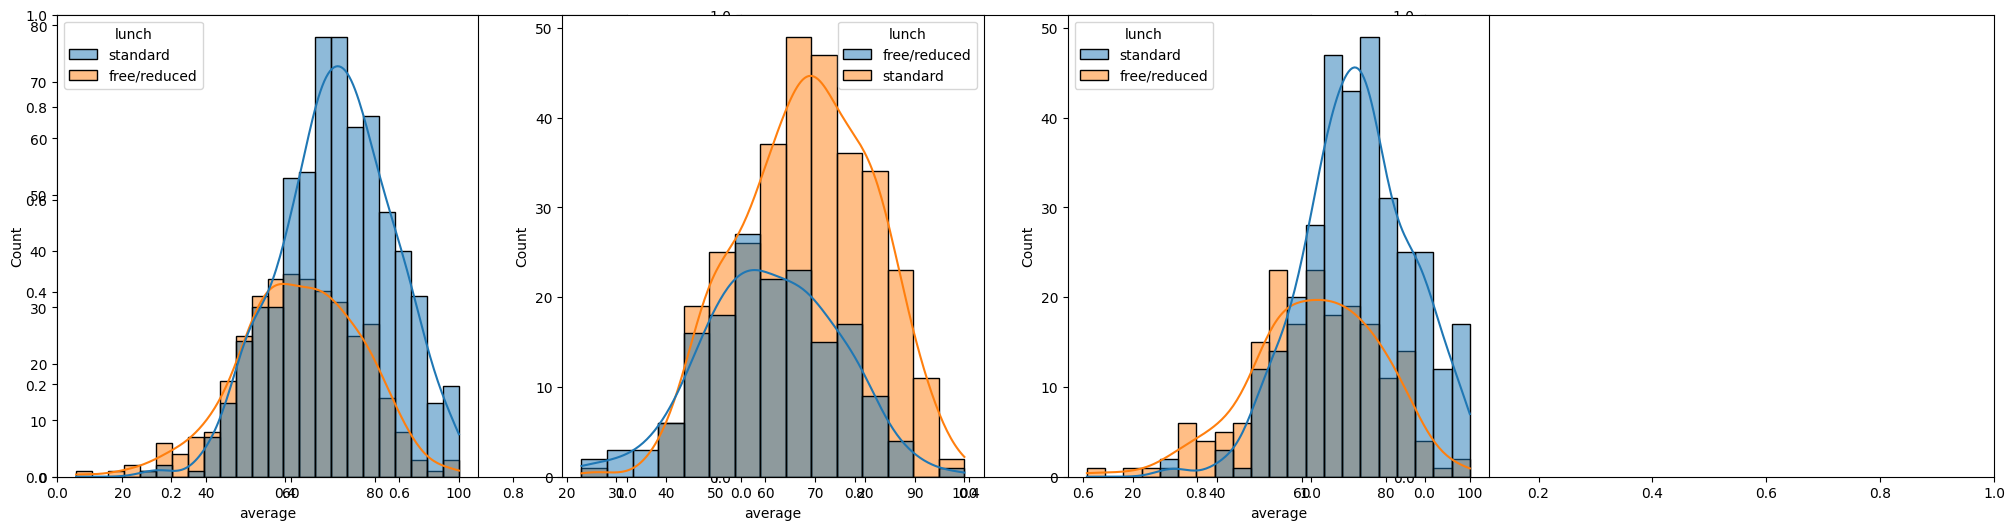

In [19]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

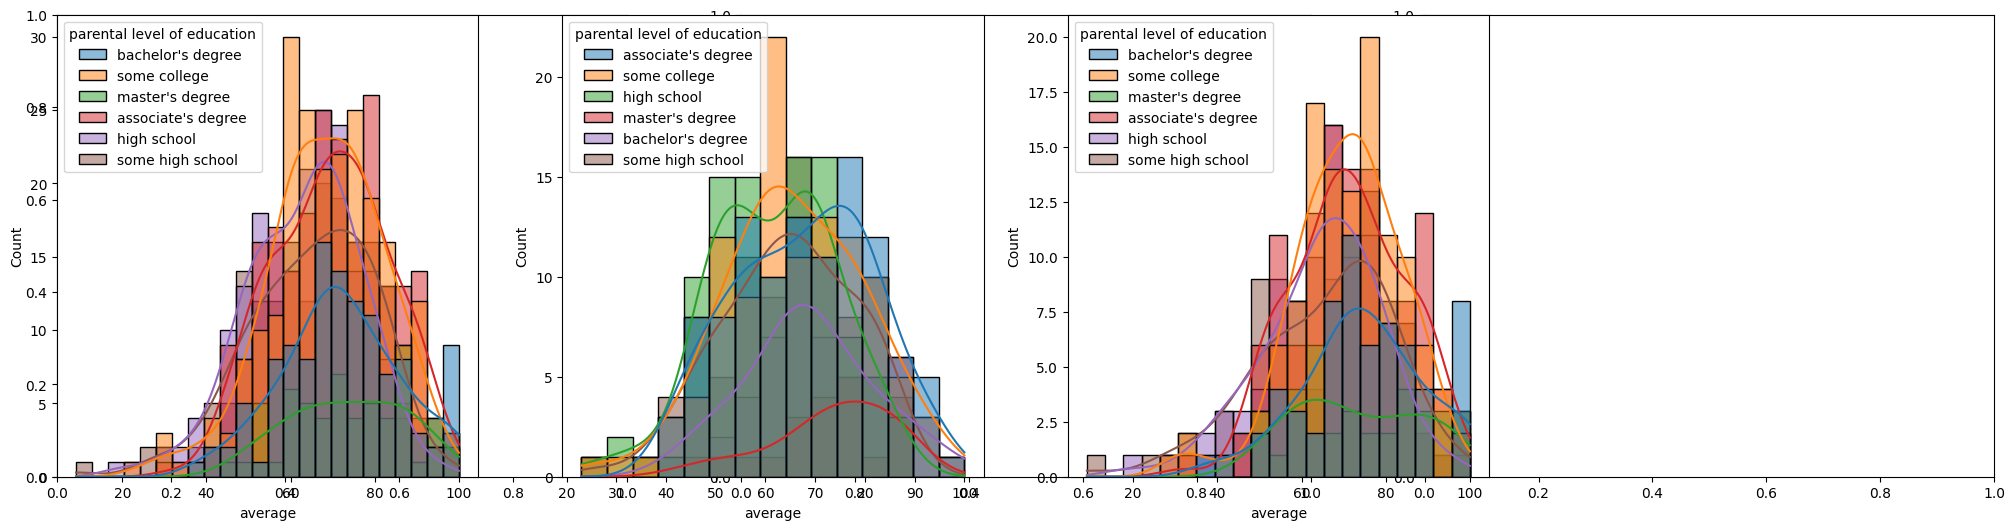

In [20]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True,hue='parental level of education')
plt.show()

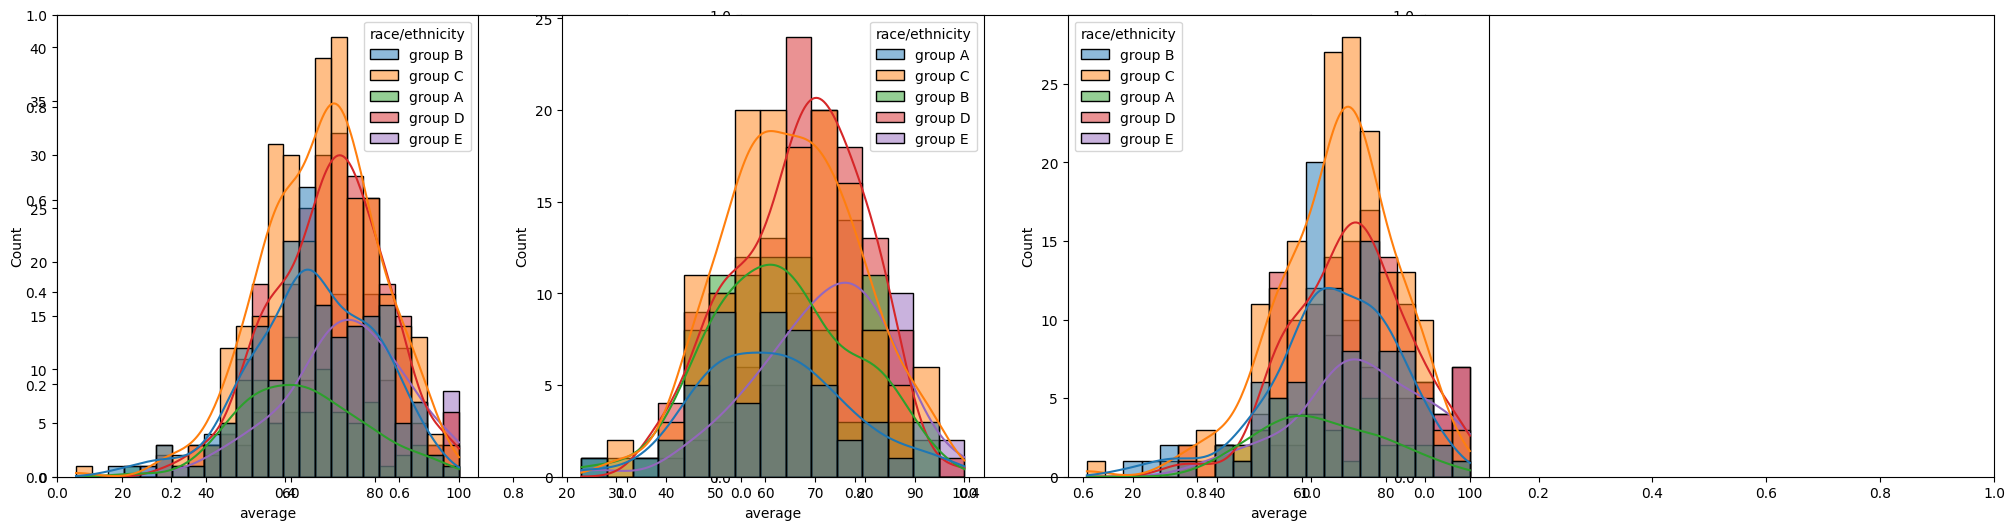

In [21]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True,hue='race/ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

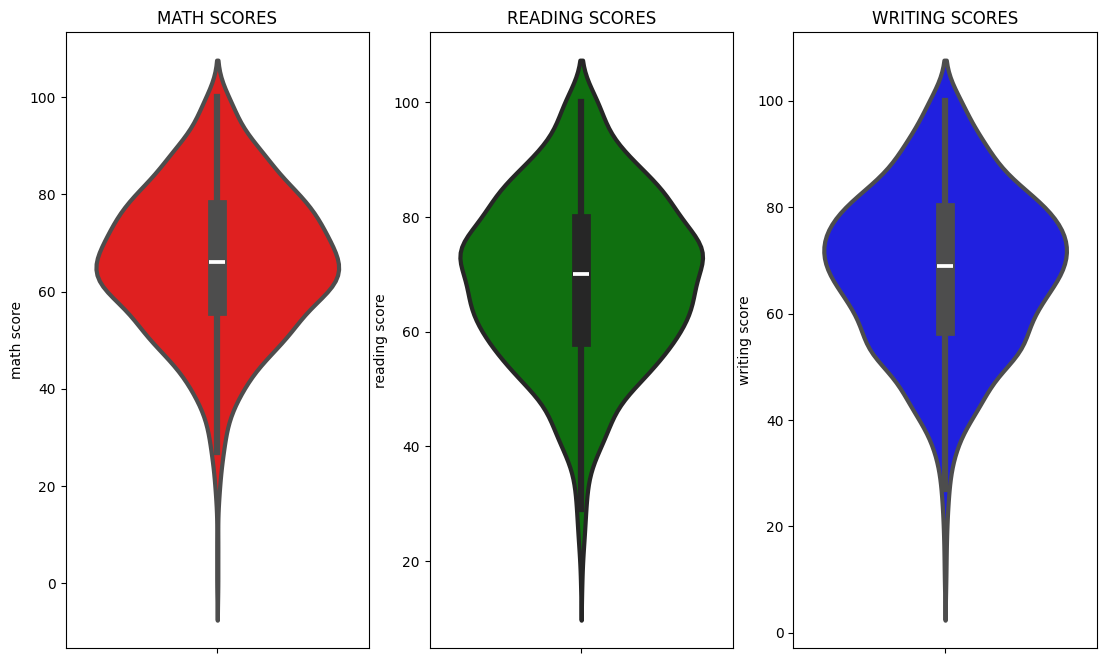

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

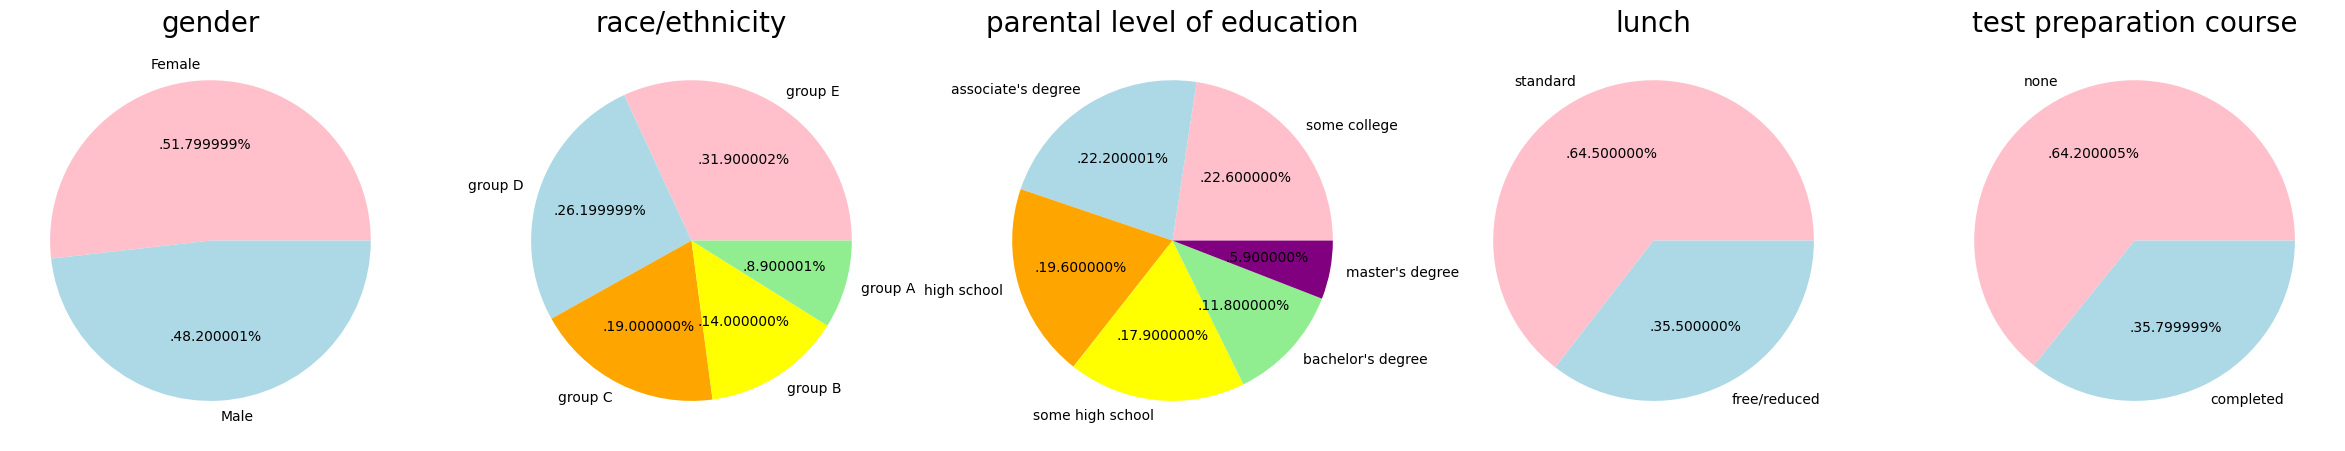

In [24]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels=['Female','Male']
color=['pink','lightblue']

plt.pie(size, labels=labels, colors=color,autopct='.%2f%%')
plt.title('gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels=['group E','group D','group C','group B','group A']
color=['pink','lightblue','orange','yellow','lightgreen']

plt.pie(size, labels=labels, colors=color,autopct='.%2f%%')
plt.title('race/ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['parental level of education'].value_counts()
labels=["some college","associate's degree","high school","some high school","bachelor's degree","master's degree"]
color=['pink','lightblue','orange','yellow','lightgreen','purple']

plt.pie(size, labels=labels, colors=color,autopct='.%2f%%')
plt.title('parental level of education', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['lunch'].value_counts()
labels=['standard','free/reduced']
color=['pink','lightblue']

plt.pie(size, labels=labels, colors=color,autopct='.%2f%%')
plt.title('lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['test preparation course'].value_counts() 
labels=['none','completed']
color=['pink','lightblue']  

plt.pie(size, labels=labels, colors=color,autopct='.%2f%%')
plt.title('test preparation course', fontsize=20) 
plt.axis('off')



#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

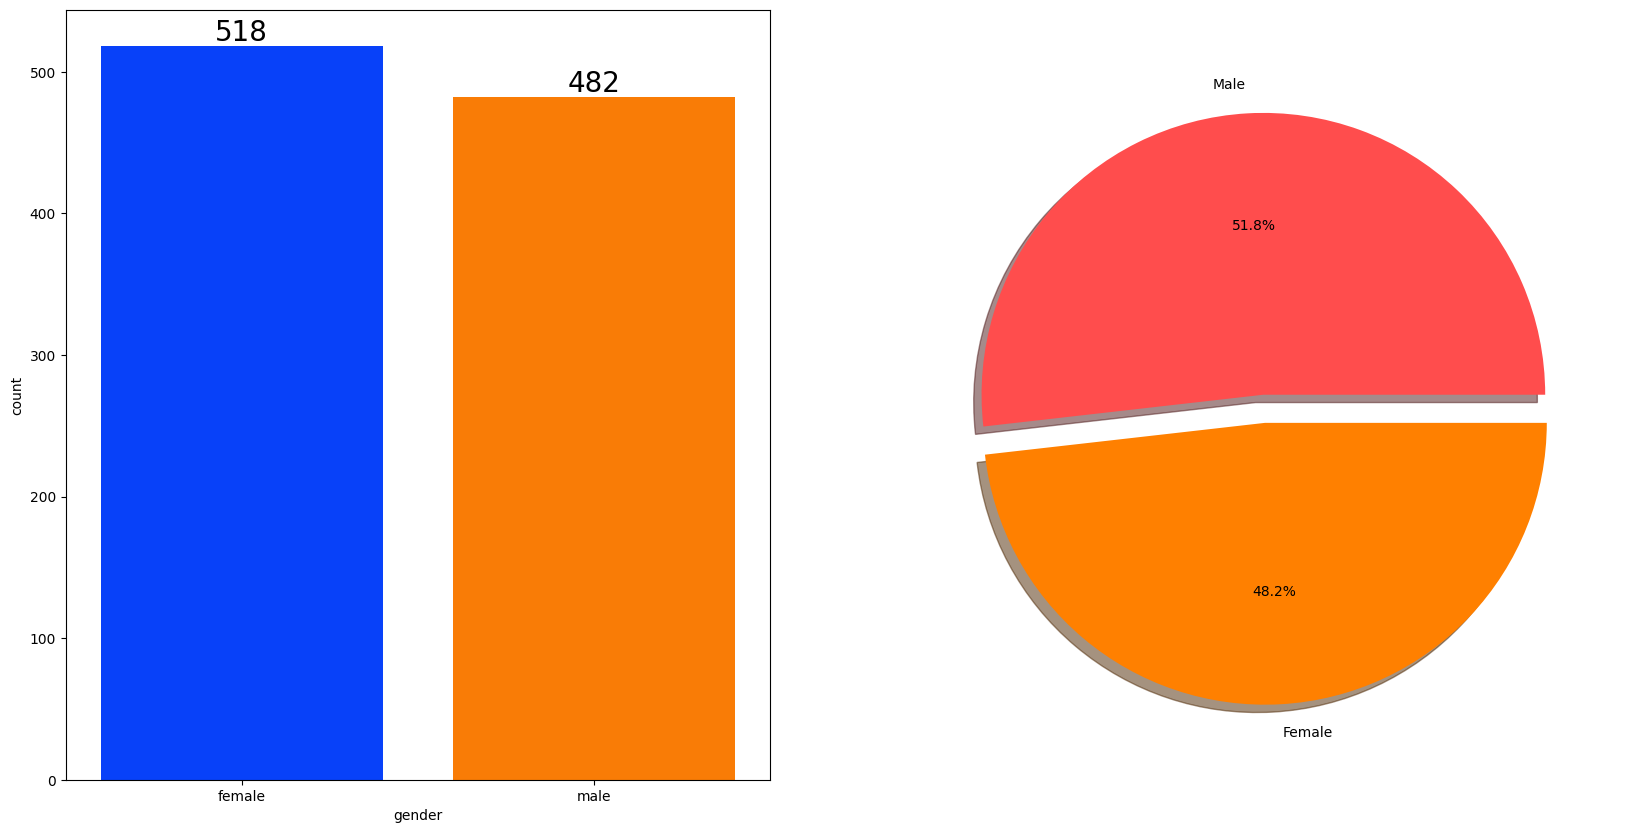

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

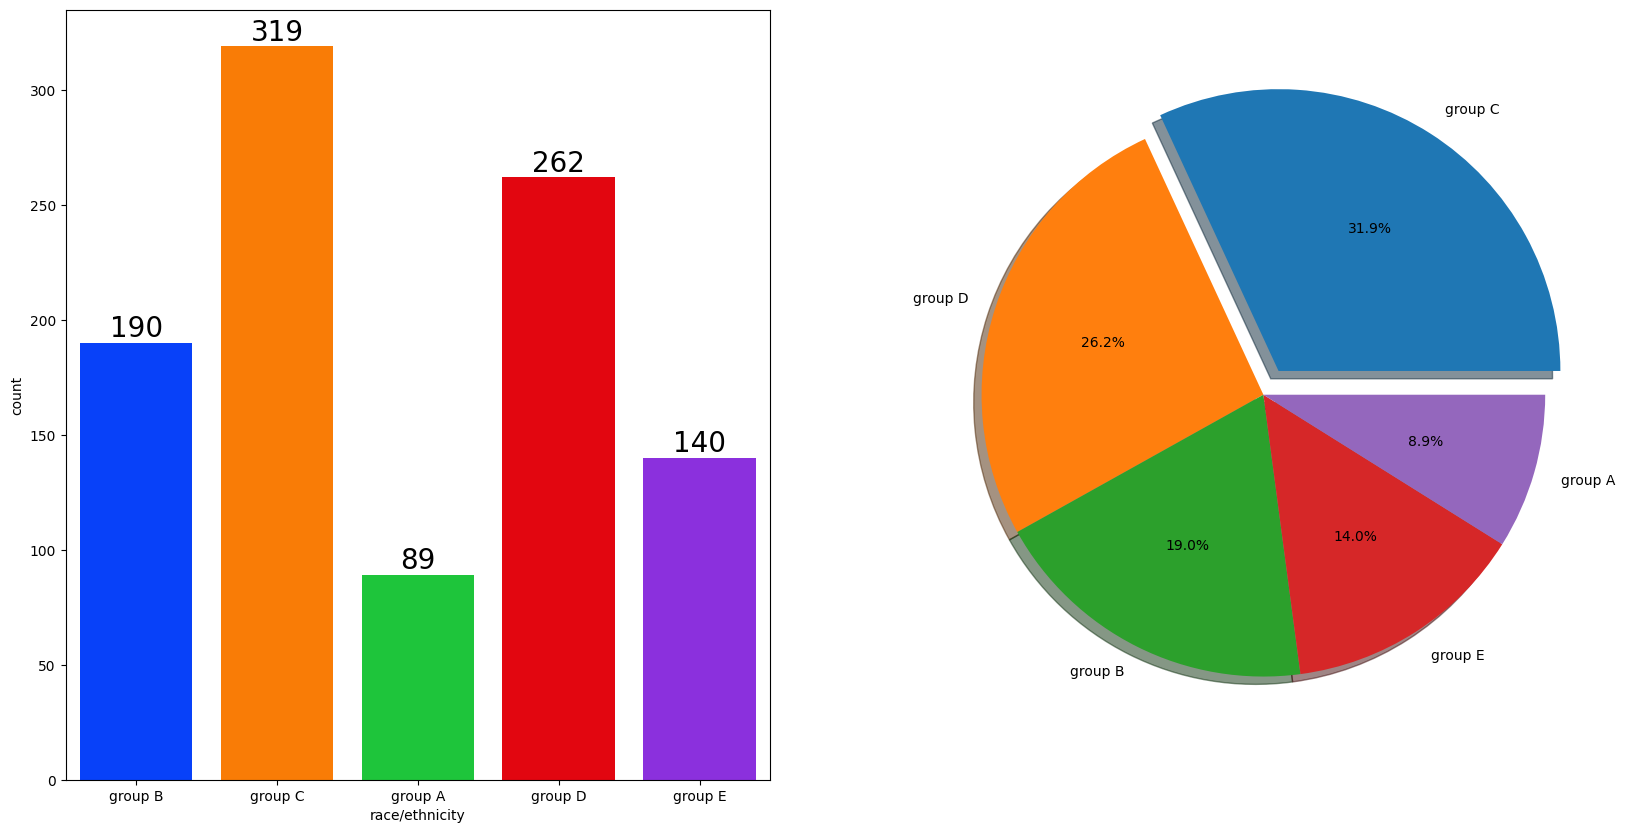

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

In [39]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


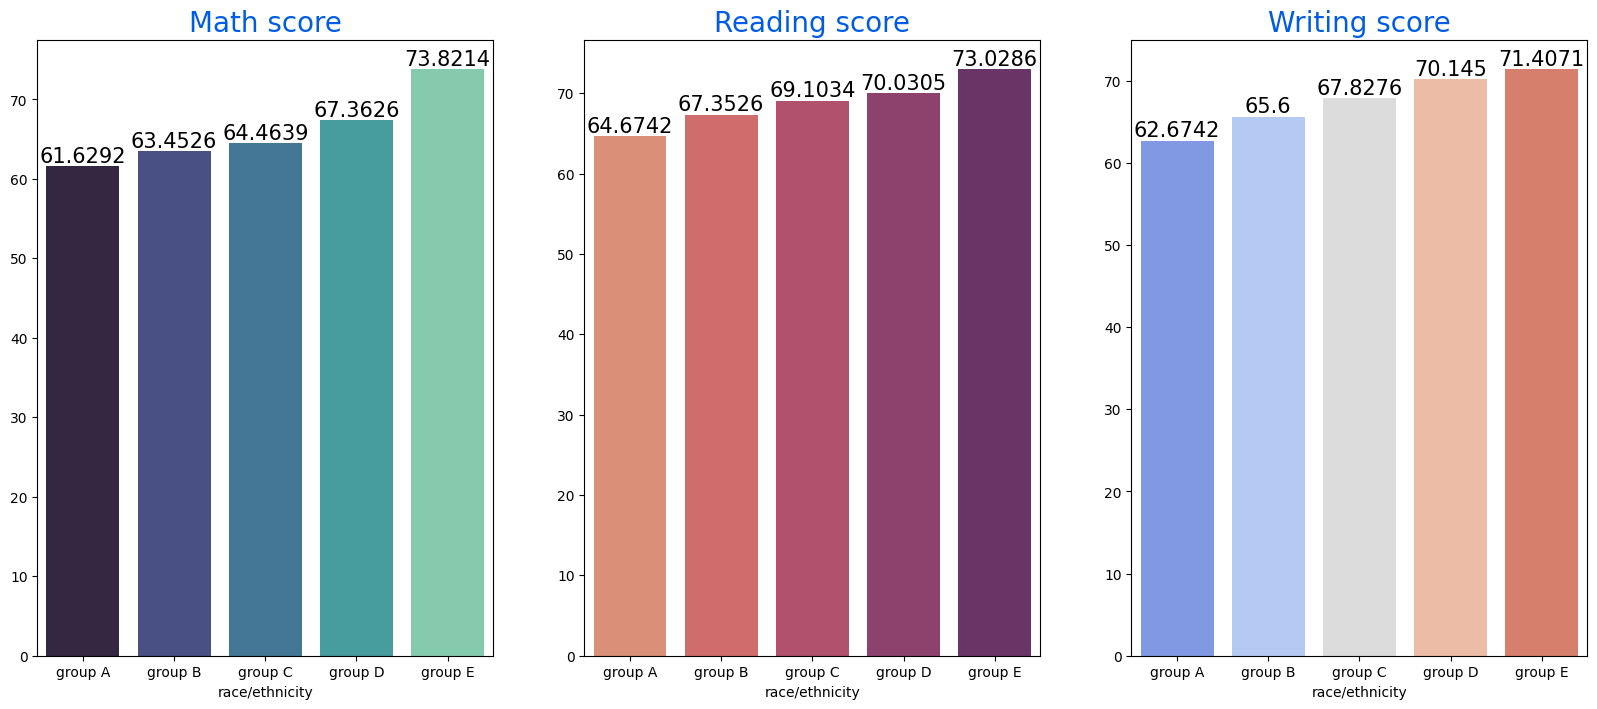

In [41]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks.